<a href="https://colab.research.google.com/github/gitflai/DDS4/blob/main/Aula_10_DDS4_Combina%C3%A7%C3%A3o_de_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

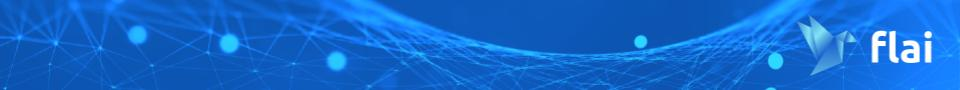

# **Aula 10 - DDS4 - Combinação de Modelos**

---
## **Importação e Preparação dos Dados**

In [21]:
# via github 

import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


In [23]:
X = dados[['bmi', 'charges']]
y = dados['smoker']

---
## **Upgrade na Técnica de Validação: _K-FOLD REPETIDO_**

In [ ]:
# Configuração da Validação Cruzada

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

validacao = RepeatedKFold(n_splits = 10, n_repeats = 5)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
# Regressão Logistica

modelo = LogisticRegression() 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
medidas['test_score'].mean()

In [ ]:
# KNN

modelo = KNeighborsClassifier(n_neighbors = 25) 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
medidas['test_score'].mean()

In [ ]:
# Árvore de Decisão

modelo = DecisionTreeClassifier(max_depth = 3) 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
medidas['test_score'].mean()

---
## **Combinação via Votos HARD**

In [ ]:
Combinação Hard

RL     KNN      ARV     VOTING-HARD
1      1        0       1  
0      1        0       0
1      1        1       1
0      0        0       0
.      .        .  
.      .        .


Combinação Soft

RL     KNN      ARV     VOTING-SOFT
0.80   0.75     0.45    0.66 -> 1
0.01   0.66     0.30    0.32 -> 0     
0.05   0.55     0.55    0.38 -> 0
.      .        .
.      .        .  
.      .        .







In [ ]:
# Combinação por votos 'Hard'

from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3)

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'hard')

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
medidas['test_score'].mean()

In [ ]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = dados[['bmi', 'charges']]
y = dados['smoker']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Regressão Logística')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Regressão Logística')   

plt.show()

---
## **Combinação de Modelos SOFT**

In [ ]:
# Combinação por votos 'Soft'

from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3)

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'soft')

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
medidas['test_score'].mean()

In [ ]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = dados[['bmi', 'charges']]
y = dados['smoker']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Regressão Logística')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Regressão Logística')   

plt.show()

---
## **Bagging de Modelos**

In [ ]:
# Bagging
from sklearn.ensemble import BaggingClassifier

modelo_base = LogisticRegression()
#modelo_base = KNeighborsClassifier(n_neighbors = 17)
#modelo_base = DecisionTreeClassifier(max_depth = 3)

modelo = BaggingClassifier(n_estimators = 50, base_estimator = modelo_base) 
medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean()

In [ ]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = dados[['bmi', 'charges']]
y = dados['smoker']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Regressão Logística')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Regressão Logística')   

plt.show()

---
## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators = 100, max_depth = 5)
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
medidas['test_score'].mean()

In [ ]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = dados[['bmi', 'charges']]
y = dados['smoker']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Regressão Logística')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Regressão Logística')   

plt.show()

---
## **Exercícios Propostos**

- Use todo o seu conhecimento adquirido até então para encontrar o modelo com a melhor acurácia para esses dados!

---
**_#itstimetoflai_** 